# Wine Quality dataset 

##  Our goal is to predict wine quality based on various features such as acidity, pH, alcohol content, etc.
# This is a regression task where we'll use supervised learning techniques to train a model to predict the wine quality ratings.


Import the packages

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Get the dataset 

In [2]:
wine_data = pd.read_csv("../Data/WineQT.csv")

### Working on the dataset

In [3]:
# Data Preprocessing
# Check for missing values
print("Missing Values:")
print(wine_data.isnull().sum())

#Information about the dataset 
print(wine_data.head(n=7))

print(wine_data.describe())

# Split the dataset into features (X) and target variable (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select a Model
model = LinearRegression()

# Train the Model
model.fit(X_train, y_train)

# Evaluate the Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error (MAE):", mae)

Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   

   free 

In [4]:
print(y_pred *100)

[542.2394064  475.03931525 529.68478602 508.88586836 609.4863327
 661.35777877 540.17609    512.07362335 580.68233477 532.70166374
 634.74095352 636.40434167 530.8747915  620.72647303 582.42473629
 484.56405414 568.66377032 569.86721808 546.14568501 640.78844424
 603.76761445 603.14772706 520.92138672 648.04245571 562.50415244
 515.76789849 656.63059143 596.16244634 513.24326764 555.39355592
 622.13803445 550.6214163  661.30025614 572.90021113 557.16753552
 530.0912943  550.27047233 603.4381742  695.74108032 657.72182267
 644.07148443 536.20440693 711.51561282 533.57926955 502.04569298
 510.19234004 566.56511628 586.06026249 462.61137625 564.63962358
 643.11119234 530.70245002 566.22035829 590.24888445 577.64027955
 640.2046318  549.23943291 566.93825941 605.51497341 522.98826755
 553.03210782 594.80815626 564.62243868 632.0470675  613.81995057
 542.30706099 688.63768829 523.19806141 489.24058448 594.14663759
 572.70658557 536.3717172  587.33038337 593.01080037 520.81668084
 518.102987

In [11]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [13]:
wine_data.isnull().sum().T #No null values 
wine_data.head(n=7).T


,0,1,2,3,4,5,6
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000,7.4000,7.9000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000,0.6600,0.6000
citric acid,0.0000,0.0000,0.040,0.560,0.0000,0.0000,0.0600
residual sugar,1.9000,2.6000,2.300,1.900,1.9000,1.8000,1.6000
chlorides,0.0760,0.0980,0.092,0.075,0.0760,0.0750,0.0690
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000,13.0000,15.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000,40.0000,59.0000
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964
pH,3.5100,3.2000,3.260,3.160,3.5100,3.5100,3.3000
sulphates,0.5600,0.6800,0.650,0.580,0.5600,0.5600,0.4600


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'Id'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

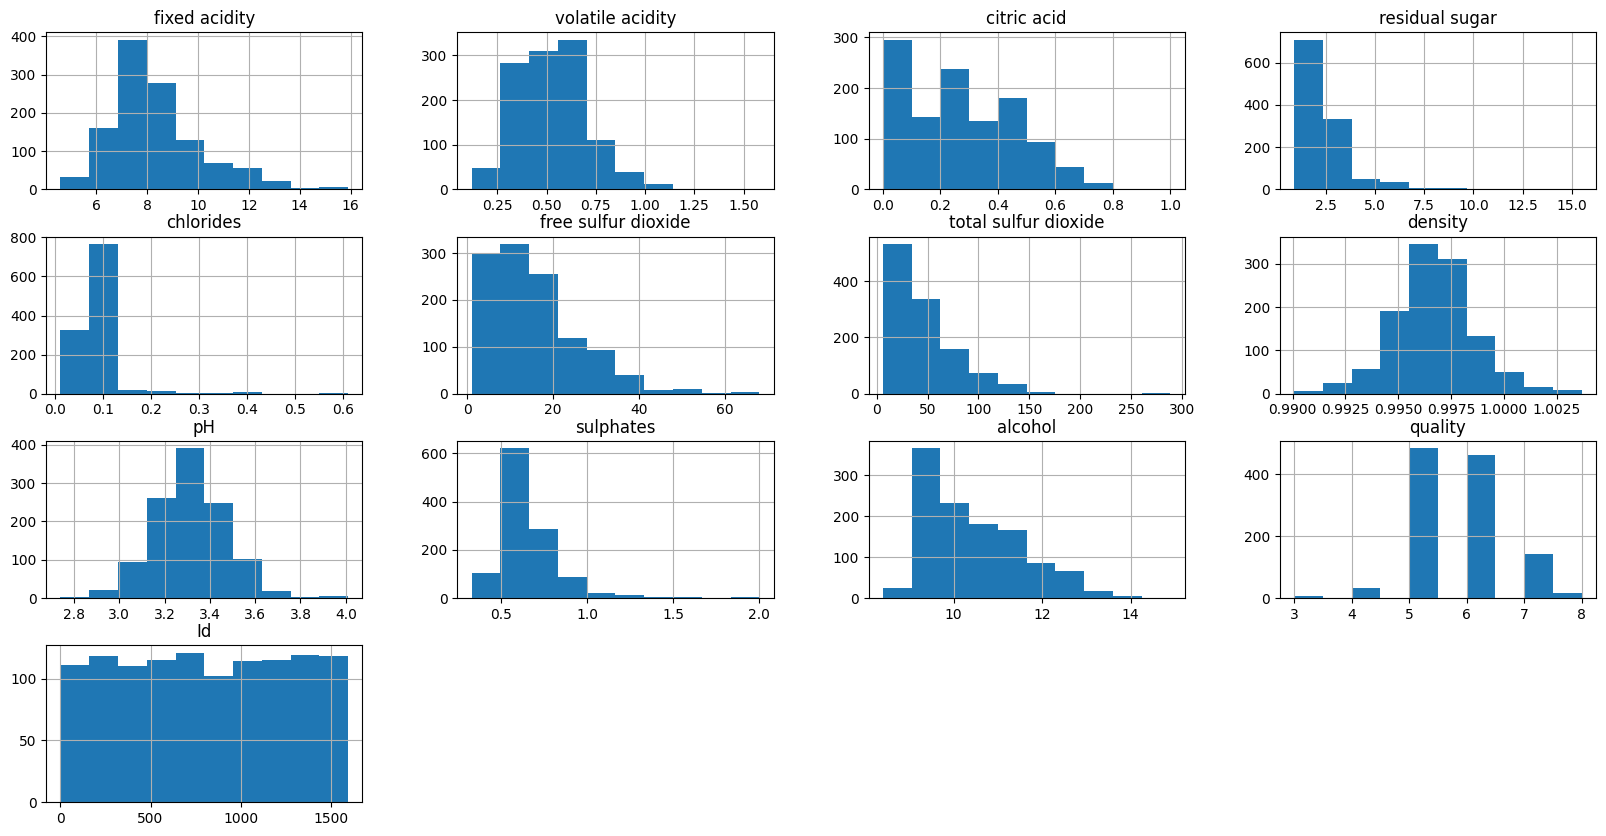

In [14]:
wine_data.columns
wine_data.shape
wine_data.isnull().sum()
wine_data.hist(figsize=(20,10))

In [15]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


When using a correlation heatmap to determine which columns to drop or not drop, there are a few considerations:

Highly Correlated Features: If two features have a high correlation coefficient close to 1 (positive correlation) or -1 (negative correlation), it indicates that they provide redundant or similar information. In such cases, keeping both features may not be necessary, and dropping one of them could reduce multicollinearity and simplify the model without losing much predictive power.

Target Correlation: If the target variable is included in the correlation heatmap, examining its correlation with other features can provide insights into which features are most strongly associated with the target variable. Features with high correlation coefficients with the target variable are typically considered important predictors and should be retained in the model.

Domain Knowledge: Consider the context of the problem and domain knowledge when interpreting correlation coefficients. Some relationships may not be captured by linear correlations, and certain features may be important predictors even if they have low correlation coefficients with the target variable.

Feature Importance: In addition to correlation coefficients, consider other measures of feature importance such as feature importance scores from decision trees or coefficients from linear regression models. These measures can provide complementary information about the predictive power of each feature and help prioritize feature selection.

Dimensionality Reduction: If there are many features with low correlation coefficients with the target variable and no strong correlations among features, dimensionality reduction techniques such as principal component analysis (PCA) or feature selection methods can help identify the most informative subset of features while preserving as much variance as possible.

<Axes: >

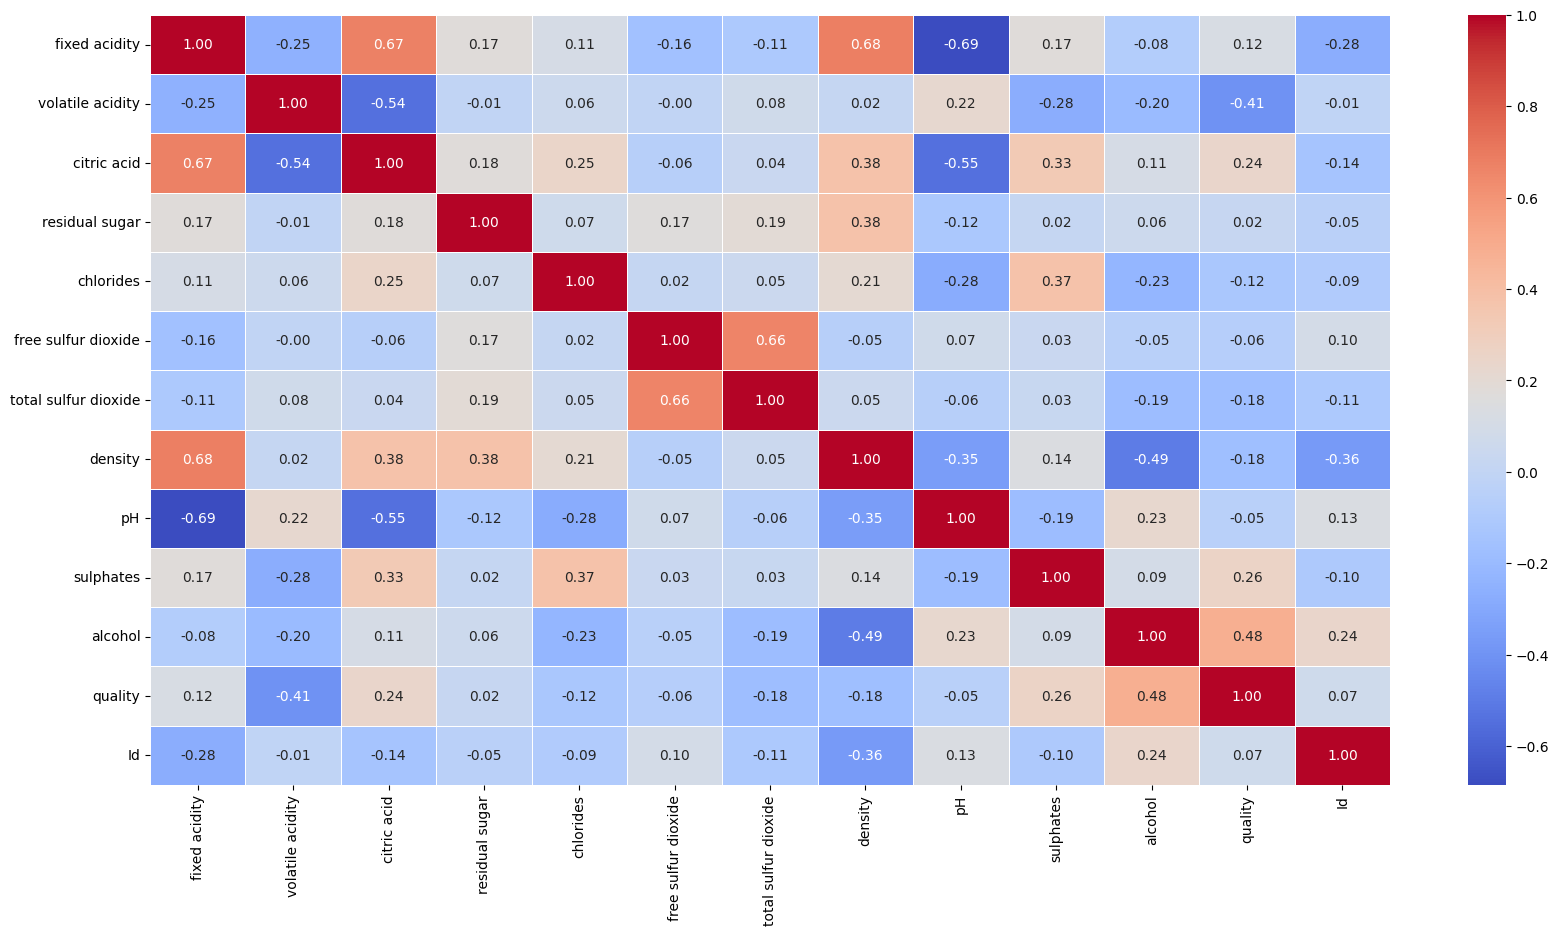

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(wine_data.corr(),annot=True,cmap='coolwarm',fmt=".2f",linewidth=0.5)

Using PCA (Principal Component Analysys) for feature(s) reduction 

In [22]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to retain (e.g., 90% of variance explained)
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1

# Retain the selected number of principal components
X_pca_selected = X_pca[:, :n_components]

# Print the number of components retained
print("Number of components retained:", n_components)


Number of components retained: 8


In [23]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to retain (e.g., 90% of variance explained)
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1

# Retain the selected number of principal components
X_pca_selected = X_pca[:, :n_components]

# Get the feature names
feature_names = X.columns

# Create DataFrame to store feature loadings
loadings_df = pd.DataFrame(pca.components_[:n_components], columns=feature_names)

# Print the loadings
print("Principal Component Loadings:")
print(loadings_df)

# Print the number of components retained
print("Number of components retained:", n_components)


Principal Component Loadings:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.476593         -0.204295     0.437978        0.168989   0.219808   
1      -0.114893          0.342102    -0.200551        0.217297   0.133251   
2      -0.099587         -0.388967     0.249782        0.155761   0.005986   
3      -0.237216          0.074252    -0.063247       -0.408790   0.650409   
4      -0.067113          0.306379    -0.070518        0.699158   0.331301   
5      -0.098387         -0.108260    -0.047173        0.107865  -0.164931   
6       0.181878          0.526846     0.066894       -0.098021   0.140352   
7      -0.314879         -0.394574     0.147274        0.265587   0.427604   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.050271              0.025591  0.409653 -0.417033   0.227146   
1             0.455961              0.536663  0.231536  0.025853  -0.100847   
2             0.494137        

In [29]:
wine_data.columns
print(f"There are {len(wine_data.columns)} features")

There are 13 features


In [32]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Compute cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to retain (e.g., 90% of variance explained)
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1

# Retain the selected number of principal components
X_pca_selected = X_pca[:, :n_components]

# Get the names of the original features
original_feature_names = X.columns

# Get the names of the features retained after PCA
selected_feature_names = original_feature_names[:n_components]

# Print the number of components retained and the names of the corresponding features
print("Number of components retained:", n_components)
print(f"\n We are retaining {n_components} features out of {len(wine_data.columns)} \n")
print("Corresponding feature names:", selected_feature_names)



Number of components retained: 8

 We are retaining 8 features out of 13 

Corresponding feature names: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'],
      dtype='object')


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Collect features into A
A = X_pca_selected  # Assuming X_pca_selected contains the selected principal components

# Collect target variable into b
b = wine_data['quality']  # Assuming 'quality' is the target variable in your DataFrame

# Split the data into training and testing sets
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

# Initialize the model (for example, a RandomForestRegressor)
model = RandomForestRegressor()

# Train the model
model.fit(A_train, b_train)

# Predict on the test set
predictions = model.predict(A_test)

# Evaluate the model (e.g., using mean squared error)
mse = mean_squared_error(b_test, predictions)
print("Mean Squared Error:", mse)




Mean Squared Error: 0.28239563318777294


In [34]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(A_train,b_train)
lr_prediction=lr_model.predict(A_test)

from sklearn.metrics import accuracy_score
lr_prediction
lr_accuracy=accuracy_score(b_test,lr_prediction)
print(f"{lr_accuracy*100 } %")

62.00873362445415 %


In [36]:
n=wine_data['quality']
M=wine_data.drop(columns='quality')

M_train,M_test,N_train,N_test=train_test_split(M,n,test_size=0.2,random_state=89)
M_train.shape,M_test.shape

((914, 12), (229, 12))

In [41]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
A_train=norm.fit_transform(A_train)
A_test=norm.fit_transform(A_test)

lr_model.fit(A_train,b_train)
lr_prediction=lr_model.predict(A_test)

from sklearn.metrics import accuracy_score
lr_prediction
lr_accuracy=accuracy_score(b_test,lr_prediction)
print(f"{lr_accuracy*100 } %")


57.64192139737992 %


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def try_algorithms(wine_data, target):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(A, b, test_size=0.2, random_state=42)
    
    # Initialize classifiers
    classifiers = {
        "Random Forest": RandomForestClassifier(),
        "Support Vector Machine": SVC(),
        "Logistic Regression": LogisticRegression()
    }
    
    # Train and test each classifier
    results = {}
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    
    return results

# Example usage:
# Assuming wine_data is your feature data and target is your target labels
# Replace wine_data and target with your actual data
results = try_algorithms(A_train, b_train)
print(results)


{'Random Forest': 0.6855895196506551, 'Support Vector Machine': 0.611353711790393, 'Logistic Regression': 0.6200873362445415}


Consistently achieving an accuracy of 60-70% across multiple algorithms suggests that the data might have inherent limitations or noise that make it difficult for the models to learn patterns effectively.



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


<Axes: >

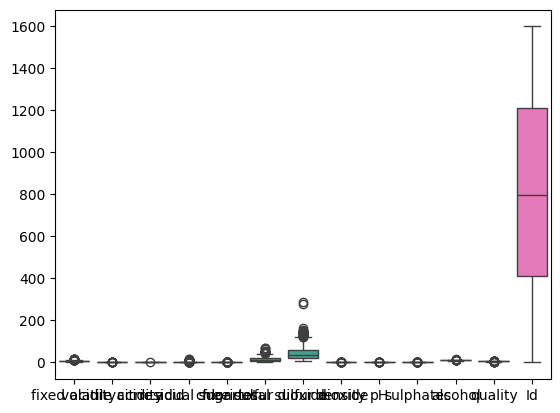

In [45]:
# Check for missing values
print(wine_data.isnull().sum())

# Check for outliers
import seaborn as sns
sns.boxplot(data=wine_data)


In [46]:
# Example of feature engineering (creating new feature interactions)
wine_data['alcohol_times_ph'] = wine_data['alcohol'] * wine_data['pH']


In [47]:
# Example of trying a different algorithm with hyperparameter tuning
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}
gb_clf = GradientBoostingClassifier()
grid_search = GridSearchCV(gb_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'learning_rate': 0.05, 'n_estimators': 100}


In [48]:
# Example of using cross-validation to evaluate model performance
from sklearn.model_selection import cross_val_score
rf_clf = RandomForestClassifier()
cv_scores = cross_val_score(rf_clf, A_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.6010929  0.66120219 0.63934426 0.62295082 0.55494505]
Mean CV accuracy: 0.6159070437758961


In [49]:
# Example of using a VotingClassifier ensemble method
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', RandomForestClassifier()), ('svm', SVC()), ('lr', LogisticRegression())], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)


c:\Users\HP\.virtualenvs\DataScience-kDDmsSNt\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.5676855895196506


In [50]:
# Example of incorporating domain knowledge into feature selection
# Suppose domain knowledge suggests that 'alcohol' and 'volatile acidity' are important features
selected_features = ['alcohol', 'volatile acidity']
X_train_domain = X_train[selected_features]
X_test_domain = X_test[selected_features]
voting_clf.fit(X_train_domain, y_train)
y_pred_domain = voting_clf.predict(X_test_domain)
accuracy_domain = accuracy_score(y_test, y_pred_domain)
print("Accuracy with selected features:", accuracy_domain)


c:\Users\HP\.virtualenvs\DataScience-kDDmsSNt\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with selected features: 0.5895196506550219
